This document contains some QM group presentaion parts shown in below:
1. multiple linear regression - based on the traffic accident data

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [99]:
# load the data
csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")

C:\Users\29425\AppData\Local\Temp\ipykernel_15384\2112012909.py:2: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")


In [100]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 36 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   accident_index                               object 
 1   accident_year                                int64  
 2   accident_reference                           object 
 3   location_easting_osgr                        float64
 4   location_northing_osgr                       float64
 5   longitude                                    float64
 6   latitude                                     float64
 7   police_force                                 int64  
 8   accident_severity                            int64  
 9   number_of_vehicles                           int64  
 10  number_of_casualties                         int64  
 11  date                                         object 
 12  day_of_week                                  int64  
 13  time        

In [101]:
csv.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [102]:
# build a model to predict the traffic accident
# base on the 1. road surface condition 2. weather condition 3. light condition 

sub_csv = csv[["light_conditions", "weather_conditions", "road_surface_conditions"]]
sub_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 3 columns):
 #   Column                   Dtype
---  ------                   -----
 0   light_conditions         int64
 1   weather_conditions       int64
 2   road_surface_conditions  int64
dtypes: int64(3)
memory usage: 199.2 MB


In [103]:
# drop the invalid data in -1
sub_csv = sub_csv.loc[(sub_csv["light_conditions"] != -1) & 
                      (sub_csv["weather_conditions"] != -1) & 
                      (sub_csv["weather_conditions"] != 8)& 
                      (sub_csv["weather_conditions"] != 9)& 
                      (sub_csv["road_surface_conditions"] != -1), ["light_conditions", "weather_conditions", "road_surface_conditions"]]

In [104]:
# calculate the cases number of each type
accident_count = sub_csv.groupby(["light_conditions", "weather_conditions", "road_surface_conditions"]).size().reset_index(name='accident_counts')
accident_count.head(100)
# accident_count.info()

,light_conditions,weather_conditions,road_surface_conditions,accident_counts
0,1,1,1,4208383
1,1,1,2,715140
2,1,1,3,7058
3,1,1,4,64565
4,1,1,5,1055
...,...,...,...,...
95,4,6,5,8
96,4,6,6,1
97,4,6,9,2
98,4,7,1,1979


In [105]:
# reform the df to do dummy
accident_count[["light_conditions", "weather_conditions", "road_surface_conditions"]] = accident_count[["light_conditions", "weather_conditions", "road_surface_conditions"]].astype(object)

# get dummy
accident_numeric = pd.get_dummies(accident_count)

accident_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   accident_counts            241 non-null    int64
 1   light_conditions_1         241 non-null    uint8
 2   light_conditions_4         241 non-null    uint8
 3   light_conditions_5         241 non-null    uint8
 4   light_conditions_6         241 non-null    uint8
 5   light_conditions_7         241 non-null    uint8
 6   weather_conditions_1       241 non-null    uint8
 7   weather_conditions_2       241 non-null    uint8
 8   weather_conditions_3       241 non-null    uint8
 9   weather_conditions_4       241 non-null    uint8
 10  weather_conditions_5       241 non-null    uint8
 11  weather_conditions_6       241 non-null    uint8
 12  weather_conditions_7       241 non-null    uint8
 13  road_surface_conditions_1  241 non-null    uint8
 14  road_surface_conditions_2 

d:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [106]:
# drop some value 
accident_final = accident_numeric.drop(["light_conditions_7", "weather_conditions_7", "road_surface_conditions_7"], axis=1)
# double check the result
accident_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   accident_counts            241 non-null    int64
 1   light_conditions_1         241 non-null    uint8
 2   light_conditions_4         241 non-null    uint8
 3   light_conditions_5         241 non-null    uint8
 4   light_conditions_6         241 non-null    uint8
 5   weather_conditions_1       241 non-null    uint8
 6   weather_conditions_2       241 non-null    uint8
 7   weather_conditions_3       241 non-null    uint8
 8   weather_conditions_4       241 non-null    uint8
 9   weather_conditions_5       241 non-null    uint8
 10  weather_conditions_6       241 non-null    uint8
 11  road_surface_conditions_1  241 non-null    uint8
 12  road_surface_conditions_2  241 non-null    uint8
 13  road_surface_conditions_3  241 non-null    uint8
 14  road_surface_conditions_4 

Text(0.5, 1.0, 'Correlation Matrix')

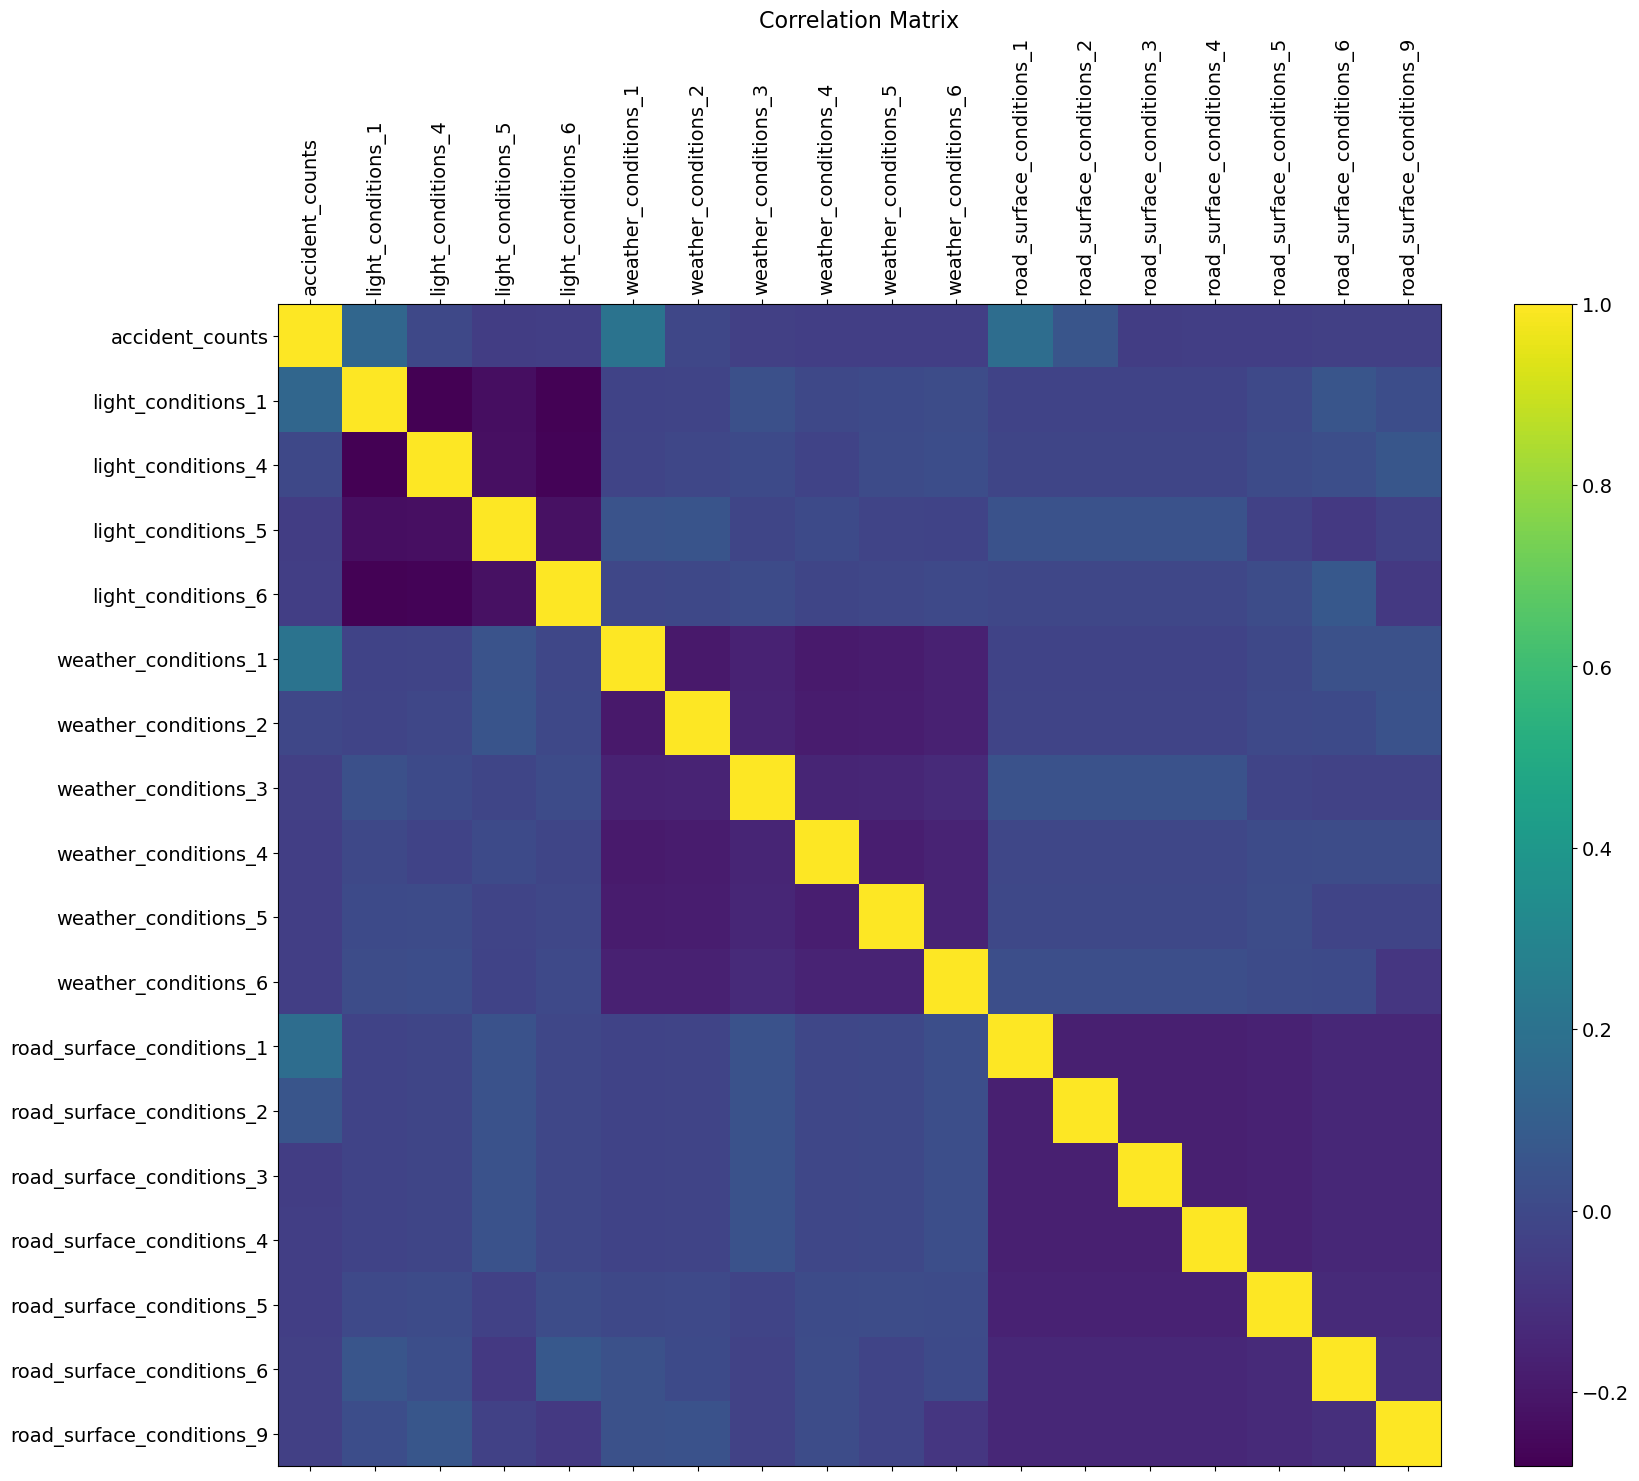

In [107]:
# draw the correalation matrix
df = accident_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [108]:
# VIF calculating  function: drop_column_using_vif_(df, thresh=5)
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


In [109]:
# using VIF on accident dataset
df_predictors_selected_VIF = drop_column_using_vif_(accident_final.drop('accident_counts', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['light_conditions_1', 'light_conditions_4', 'light_conditions_5',
       'light_conditions_6', 'weather_conditions_1', 'weather_conditions_2',
       'weather_conditions_3', 'weather_conditions_4', 'weather_conditions_5',
       'weather_conditions_6', 'road_surface_conditions_1',
       'road_surface_conditions_2', 'road_surface_conditions_3',
       'road_surface_conditions_4', 'road_surface_conditions_5',
       'road_surface_conditions_6', 'road_surface_conditions_9'],
      dtype='object')


In [114]:
# build the model via VIF
model_accident = sm.OLS(endog=accident_final[['accident_counts']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_accident.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        accident_counts   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.765
Date:                Tue, 06 Dec 2022   Prob (F-statistic):             0.0338
Time:                        01:04:25   Log-Likelihood:                -3354.0
No. Observations:                 241   AIC:                             6744.
Df Residuals:                     223   BIC:                             6807.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -9.32e+04   8.14e+04     -1.144      0.254   -2.54e+05    6.73e+04
light_conditions_1         1.229e+05   5.62e+04      2.186      0.030    1.21e+04    2.34e+05
light_conditions_4         4.241e+04   5.67e+04      0.748      0.455   -6.93e+04    1.54e+05
light_conditions_5         -1.68e+04   6.09e+04     -0.276      0.783   -1.37e+05    1.03e+05
light_conditions_6         1.529e+04   5.73e+04      0.267      0.790   -9.76e+04    1.28e+05
weather_conditions_1       1.787e+05   6.47e+04      2.762      0.006    5.12e+04    3.06e+05
weather_conditions_2       3.894e+04    6.5e+04      0.599      0.550   -8.92e+04    1.67e+05
weather_conditions_3      -1.788e+04   7.19e+04     -0.249      0.804   -1.59e+05    1.24e+05
weather_conditions_4       6378.2892   6.62e+04      0.096      0.923   -1.24e+05    1.37e+05
weather_conditions_5       2225.2625   6.66e+04      0.033      0.973   -1.29e+05    1.33e+05
weather_conditions_6      -1.368e+04   7.03e+04     -0.195      0.846   -1.52e+05    1.25e+05
road_surface_conditions_1    1.9e+05   7.68e+04      2.472      0.014    3.86e+04    3.41e+05
road_surface_conditions_2  1.058e+05   7.68e+04      1.377      0.170   -4.56e+04    2.57e+05
road_surface_conditions_3  3.411e+04   7.68e+04      0.444      0.658   -1.17e+05    1.86e+05
road_surface_conditions_4  3.656e+04   7.68e+04      0.476      0.635   -1.15e+05    1.88e+05
road_surface_conditions_5  2.197e+04   7.82e+04      0.281      0.779   -1.32e+05    1.76e+05
road_surface_conditions_6  1968.4272   8.28e+04      0.024      0.981   -1.61e+05    1.65e+05
road_surface_conditions_9  5721.6176   8.26e+04      0.069      0.945   -1.57e+05    1.69e+05
==============================================================================
Omnibus:                      482.116   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           286522.037
Skew:                          12.001   Prob(JB):                         0.00
Kurtosis:                     170.204   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""